# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load Dataset

In [2]:
# load Dataset
df_mall = pd.read_csv('Mall_Customers.csv')
df_mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Eksplore Data

Text(0, 0.5, 'Spending Score (1-100)')

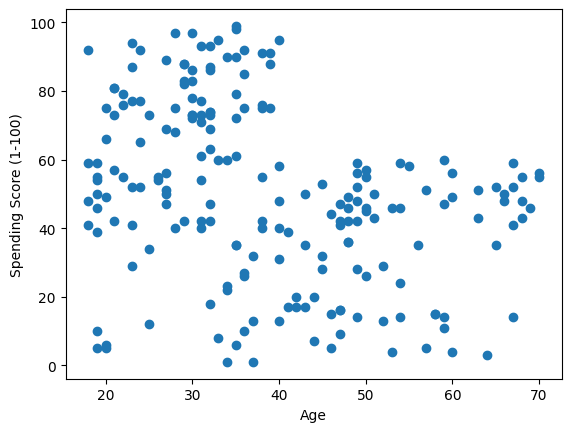

In [3]:
plt.scatter(df_mall["Age"], 
            df_mall["Spending Score (1-100)"])

plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

Text(0, 0.5, 'Annual Income (k$)')

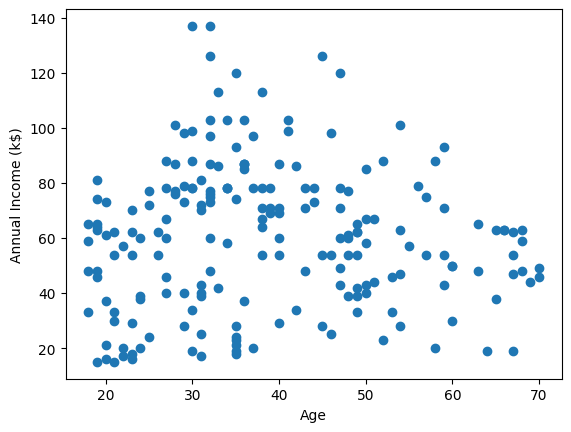

In [4]:
plt.scatter(df_mall["Age"], 
            df_mall["Annual Income (k$)"])

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

Text(0, 0.5, 'Annual Income (k$)')

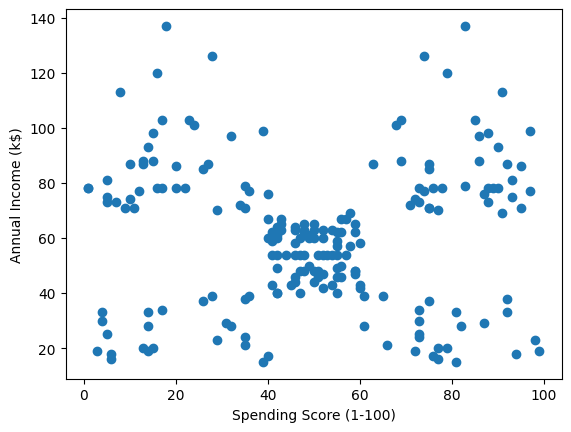

In [5]:
plt.scatter(df_mall["Spending Score (1-100)"], 
            df_mall["Annual Income (k$)"])

plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

In [6]:
# Check Missing Values
df_mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Kolom paling relevan untuk Clustering

In [7]:
relevant_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

df_mall = df_mall[relevant_cols]

# Tranformasi data

In [8]:
scaler = StandardScaler()

scaler.fit(df_mall)

scaled_data = scaler.transform(df_mall)

# Menentukan jumlah Cluster

In [9]:
def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [10]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

# Maksimum K=12

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

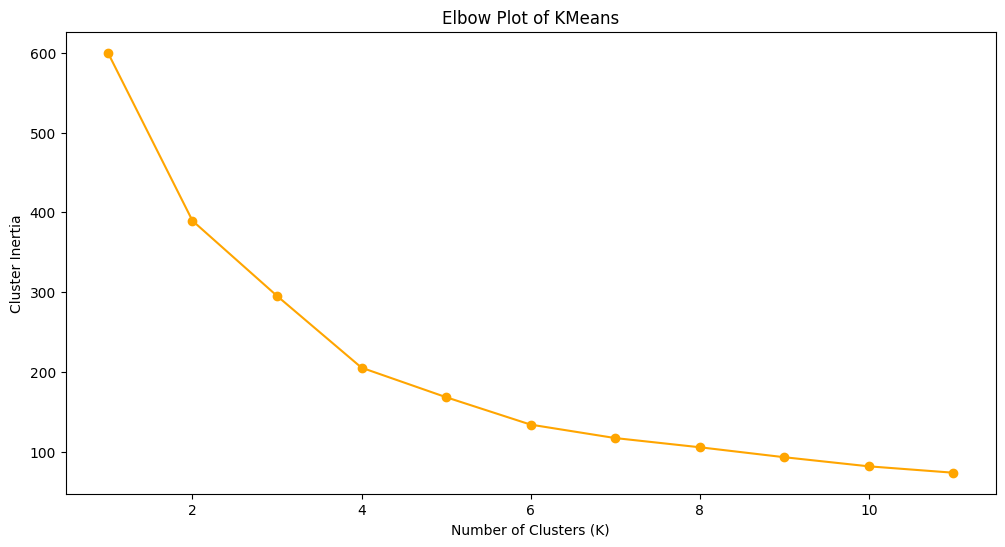

In [11]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)

# K-Means Model

In [12]:
kmeans_model = KMeans(n_clusters = 5)

kmeans_model.fit(scaled_data)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

# Buat Label

In [13]:
df_mall["cluster"] = kmeans_model.labels_

df_mall.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,0
4,31,17,40,0


# Hasil Plot Clustering

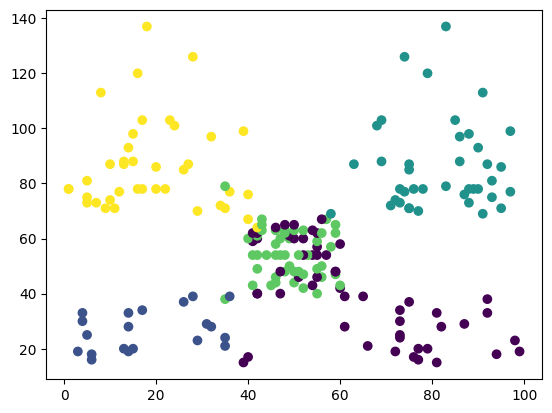

In [14]:
plt.scatter(df_mall["Spending Score (1-100)"], 
            df_mall["Annual Income (k$)"], 
            c = df_mall["cluster"])